<a href="https://colab.research.google.com/github/songiangvn/Algorithm-Design-Lab/blob/main/AD_Lecture_1_Stable_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Matching Problem

## Input
**Input.**  A set of **n** hospitals **H** and a set of **n** students **S**.
- Each hospital h ∈ H ranks students.
- Each student s ∈ S ranks hospitals

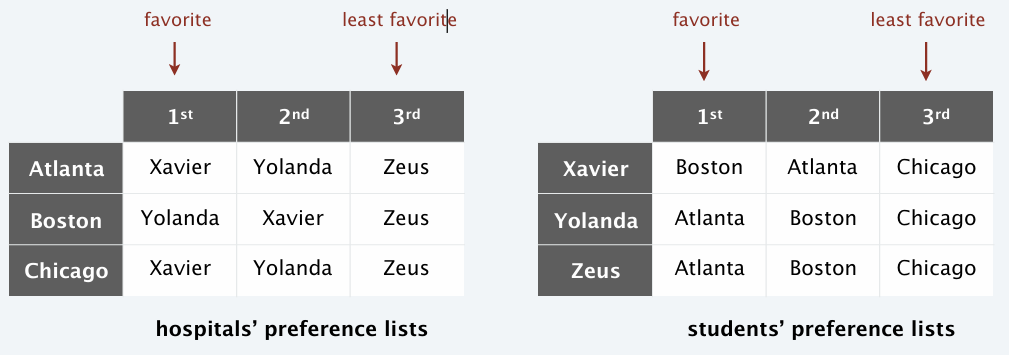

## Perfect Matching

**Def.**  A  matching M is a set of ordered pairs h–s with h ∈ H and s ∈ S s.t.
- Each hospital h ∈ H appears in at most one pair of M.
- Each student s ∈ S appears in at most one pair of M.

**Def.**  A matching M is perfect if **|M| = |H| = |S| = n.**

## Unstable pair(cặp đôi "không ổn định")

Có thể hiểu là cần được thay thế

Def.  Given a perfect matching M, hospital h and student s form an
 **unstable pair** if both:
- h prefers s to matched student.
- s prefers h to matched hospital.

**Key point.**  An unstable pair h–s could each improve by joint action

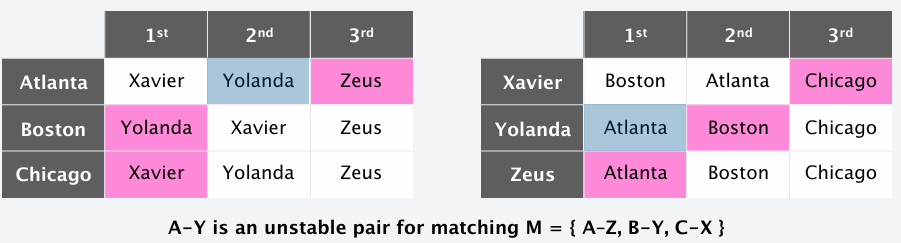

### Example:

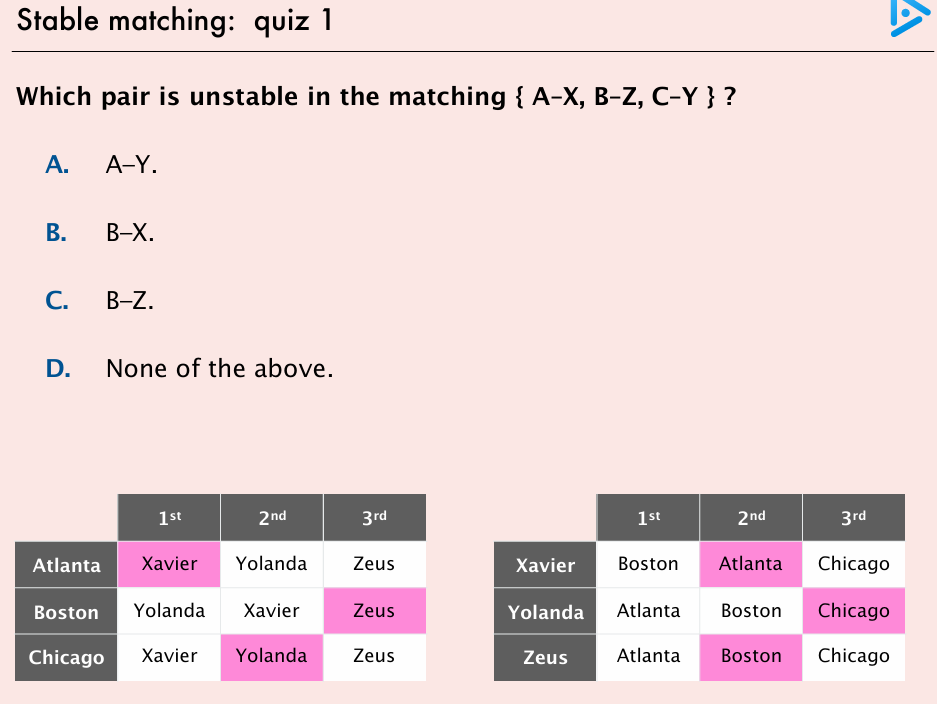

Answer: B.B-X, vì Boston thích Xavier hơn Zeus, và Xavier thích Boston hơn Atlanta

## Stable Matching Problem

Def.  A **stable matching** is a perfect matching with no unstable pairs

### Stable matching problem: Given the preference lists of n hospitals and n students, find a stable matching (if one exists).

> Q: Do stable matchings always exist?

> A: No!

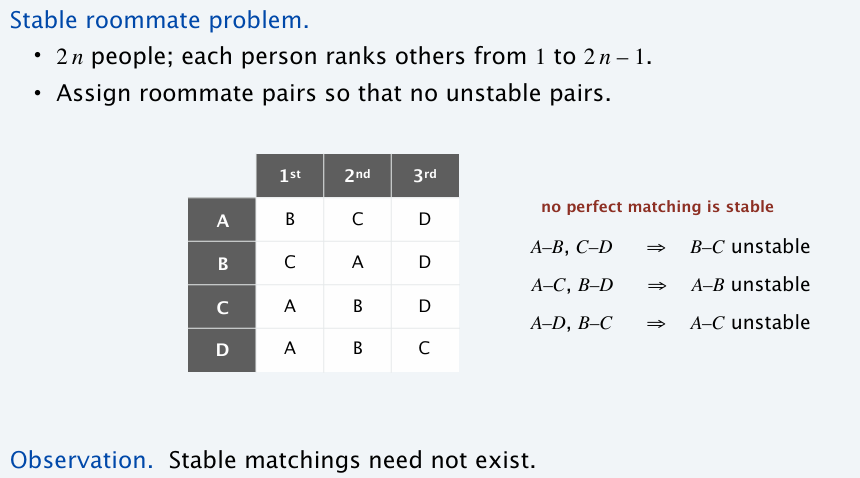

# Gale–Shapley algorithm

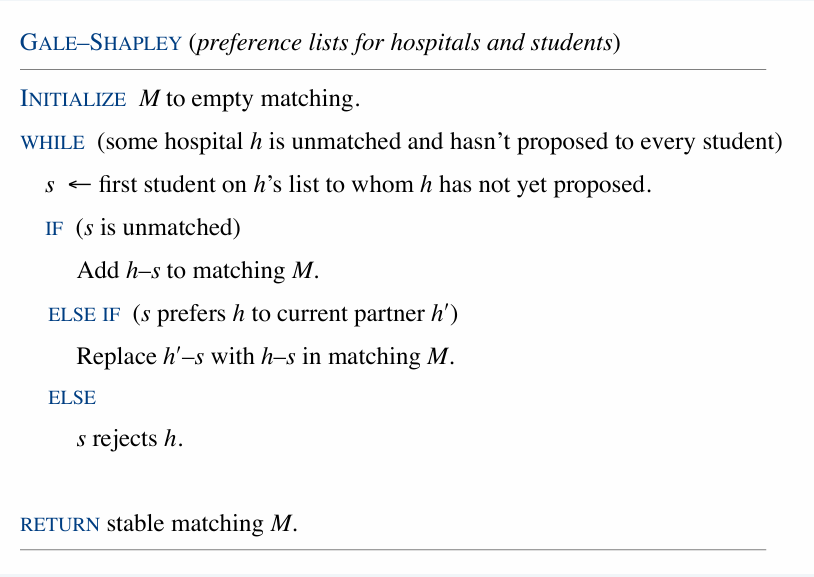

## Tóm tắt ý tưởng thuật toán:

**Tóm tắt ý tưởng thuật toán Gale-Shapley:**

1. **Khởi tạo:**  
   - Bắt đầu với một tập ghép đôi rỗng $ M $.

2. **Lặp lại:**  
   - Trong khi còn bệnh viện $ h $ chưa được ghép đôi và chưa đề nghị với tất cả sinh viên:  
     - Chọn sinh viên $ s $ đầu tiên trong danh sách ưu tiên của $ h $ mà $ h $ chưa đề nghị.  
     - Kiểm tra:  
       - Nếu $ s $ chưa được ghép đôi:  
         - Thêm cặp $ h $–$ s $ vào $ M $.  
       - Nếu $ s $ đã được ghép đôi nhưng thích $ h $ hơn đối tác hiện tại $ h' $:  
         - Thay thế $ h' $ bằng $ h $ trong $ M $.  
       - Nếu $ s $ không thích $ h $ hơn đối tác hiện tại:  
         - $ s $ từ chối $ h $.

3. **Kết thúc:**  
   - Trả về tập ghép đôi ổn định $ M $.  

**Ý tưởng chính:**  
Bệnh viện sẽ lần lượt đề nghị với các sinh viên theo thứ tự ưu tiên của mình. Sinh viên sẽ luôn giữ lại đối tác tốt nhất mà họ nhận được, đảm bảo rằng thuật toán hội tụ đến một ghép đôi ổn định.


## Code chi tiết:

In [ ]:
def gale_shapley(hospitals, students):
    """
    Thuật toán Gale-Shapley để tìm ghép đôi ổn định giữa bệnh viện và sinh viên.

    :param hospitals: Dictionary chứa danh sách ưu tiên của các bệnh viện (key là tên bệnh viện, value là danh sách sinh viên theo thứ tự ưu tiên).
    :param students: Dictionary chứa danh sách ưu tiên của các sinh viên (key là tên sinh viên, value là danh sách bệnh viện theo thứ tự ưu tiên).
    :return: Dictionary chứa ghép đôi ổn định (key là bệnh viện, value là sinh viên).
    """
    # Khởi tạo
    free_hospitals = list(hospitals.keys())  # Danh sách các bệnh viện chưa được ghép đôi
    proposals = {h: [] for h in hospitals}  # Lưu danh sách sinh viên mà mỗi bệnh viện đã đề nghị
    matches = {}  # Kết quả ghép đôi (key: sinh viên, value: bệnh viện)
    # dictionary proposals để lưu danh sách những sinh viên đã được xét với bệnh viện h rồi, để đảm bảo rằng mỗi cặp xét 1 lần thôi
    while free_hospitals:
        h = free_hospitals.pop(0)  # Lấy một bệnh viện chưa được ghép đôi
        # Tìm sinh viên đầu tiên mà bệnh viện chưa đề nghị
        for s in hospitals[h]:
            if s not in proposals[h]:
                proposals[h].append(s)  # Đánh dấu rằng bệnh viện đã đề nghị với sinh viên này
                # Nếu sinh viên chưa được ghép đôi
                if s not in matches:
                    matches[s] = h  # Ghép đôi sinh viên với bệnh viện
                    break
                else:
                    # Nếu sinh viên đã được ghép đôi, kiểm tra xem sinh viên có thích bệnh viện mới hơn không
                    current_h = matches[s]
                    if students[s].index(h) < students[s].index(current_h):
                        # Sinh viên thích bệnh viện mới hơn
                        matches[s] = h  # Thay thế bệnh viện hiện tại bằng bệnh viện mới
                        free_hospitals.append(current_h)  # Bệnh viện cũ trở lại danh sách chưa được ghép đôi
                        break
        else:
            # Nếu không còn sinh viên nào để đề nghị, bệnh viện vẫn chưa được ghép đôi
            free_hospitals.append(h)

    # Định dạng kết quả ghép đôi
    stable_matching = {h: s for s, h in matches.items()}
    return stable_matching


# Ví dụ sử dụng
hospitals = {
    "H1": ["S1", "S2", "S3"],
    "H2": ["S2", "S3", "S1"],
    "H3": ["S3", "S1", "S2"]
}

students = {
    "S1": ["H1", "H2", "H3"],
    "S2": ["H2", "H1", "H3"],
    "S3": ["H3", "H1", "H2"]
}

result = gale_shapley(hospitals, students)
print("Ghép đôi ổn định:", result)

Ghép đôi ổn định: {'H1': 'S1', 'H2': 'S2', 'H3': 'S3'}


## Proof of correctness:

- Observation: Once a student is matched, the student never becomes unmatched; only “trades up.”

> ***Claim***.  Algorithm terminates after at most $n^2$ iterations of WHILE loop.

> Pf.  Each time through the WHILE loop, a hospital proposes to a new student. Thus, there are at most $n^2$ possible proposals.

Tức là mỗi lần lấy ra một hospital chưa được ghép cặp, thì 1 student chưa được ghép cặp sẽ được ghép thêm

### Chứng minh: Tính termination

**Claim.**  Gale–Shapley outputs a matching.
- Hospital proposes only if unmatched.  ⇒  matched to ≤ 1 student
- Student keeps only best hospital. ⇒  matched to ≤ 1 hospital

### Chứng minh: Perfect Matching

**Claim.**  In Gale–Shapley matching, all hospitals get matched.


**Mệnh đề (Claim):**  
Trong thuật toán Gale-Shapley, tất cả các bệnh viện đều được ghép đôi (matched) khi thuật toán kết thúc.

---

**Chứng minh (Proof):**  
Chứng minh bằng phản chứng (**proof by contradiction**).

---

**Các bước chứng minh:**

1. **Giả sử phản chứng:**  
   Giả sử có một bệnh viện \( h \in H \) không được ghép đôi (unmatched) khi thuật toán Gale-Shapley kết thúc.

2. **Hệ quả:**  
   Nếu \( h \) không được ghép đôi, thì phải có ít nhất một sinh viên \( s \in S \) cũng không được ghép đôi (vì số lượng bệnh viện và sinh viên là hữu hạn, và mỗi bệnh viện chỉ có thể ghép với một sinh viên).

3. **Quan sát:**  
   Theo thuật toán Gale-Shapley, nếu một sinh viên \( s \) không được ghép đôi, điều đó có nghĩa là \( s \) chưa bao giờ nhận được bất kỳ lời đề nghị nào từ bất kỳ bệnh viện nào.

4. **Mâu thuẫn:**  
   Tuy nhiên, thuật toán Gale-Shapley đảm bảo rằng mỗi bệnh viện sẽ lần lượt đề nghị với tất cả các sinh viên trong danh sách ưu tiên của mình (theo thứ tự).  
   - Vì \( h \) không được ghép đôi, điều đó có nghĩa là \( h \) đã đề nghị với tất cả các sinh viên trong danh sách của mình nhưng không được ghép với bất kỳ ai.  
   - Điều này mâu thuẫn với giả định rằng \( s \) không được ghép đôi và chưa bao giờ nhận được lời đề nghị từ \( h \).

5. **Kết luận:**  
   Mâu thuẫn này chứng minh rằng giả định ban đầu (có một bệnh viện không được ghép đôi) là sai. Do đó, tất cả các bệnh viện đều được ghép đôi khi thuật toán kết thúc.

---

#### Chứng minh tính đúng đắn: Tính ổn định

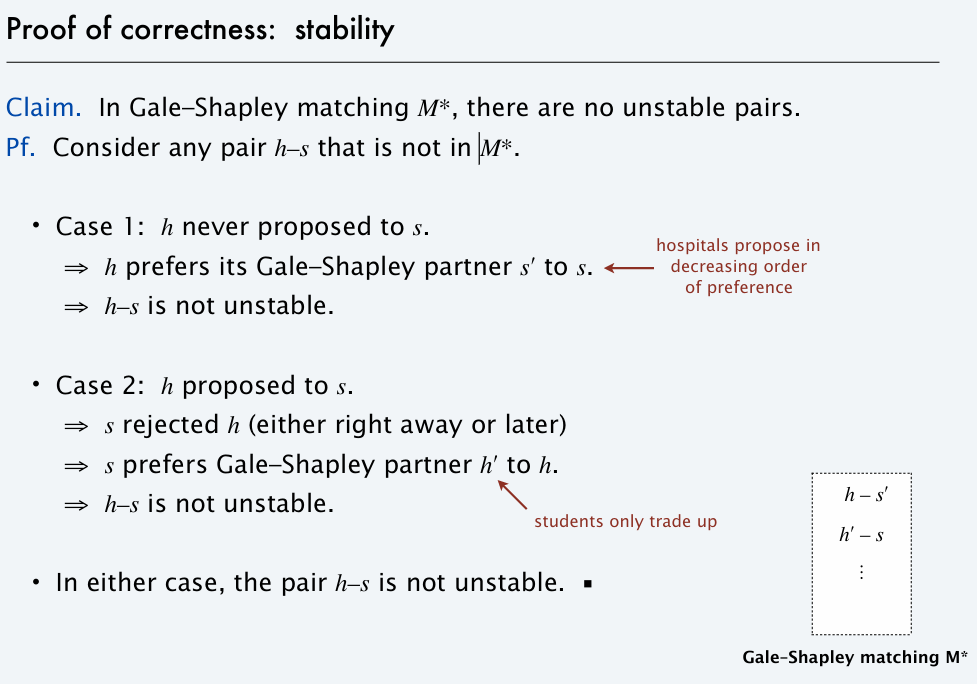

#### **Mệnh đề (Claim):**  
Trong ghép đôi Gale-Shapley $M^*$, không tồn tại cặp không ổn định.

---

#### **Ý nghĩa của cặp không ổn định:**
Một cặp $h$–$s$ (bệnh viện $h$ và sinh viên $s$) được gọi là **không ổn định** nếu:
1. $h$ thích $s$ hơn đối tác hiện tại của mình trong $M^*$.
2. $s$ cũng thích $h$ hơn đối tác hiện tại của mình trong $M^*$.

Nếu không có cặp không ổn định, ghép đôi được gọi là **ổn định**.

---

#### **Chứng minh:**

Xét một cặp $h$–$s$ không thuộc ghép đôi $M^*$. Có hai trường hợp:

---

##### **Trường hợp 1: $h$ chưa bao giờ đề nghị với $s$.**
- Theo thuật toán Gale-Shapley, bệnh viện $h$ đề nghị với các sinh viên theo thứ tự giảm dần trong danh sách ưu tiên của mình.
- Nếu $h$ chưa bao giờ đề nghị với $s$, điều đó có nghĩa là $h$ thích đối tác hiện tại của mình trong $M^*$ (gọi là $s'$) hơn $s$.
- Do đó, $h$–$s$ không phải là cặp không ổn định.

---

##### **Trường hợp 2: $h$ đã đề nghị với $s$.**
- Nếu $h$ đã đề nghị với $s$, thì $s$ đã từ chối $h$ (ngay lập tức hoặc sau này).
- Điều này có nghĩa là $s$ thích đối tác hiện tại của mình trong $M^*$ (gọi là $h'$) hơn $h$.
- Do đó, $h$–$s$ không phải là cặp không ổn định.

---

#### **Kết luận:**
Trong cả hai trường hợp, cặp $h$–$s$ không thể là cặp không ổn định.  
Vì vậy, ghép đôi $M^*$ là **ổn định**.

---

#### **Giải thích trực quan:**
- **Bệnh viện:** Luôn đề nghị với sinh viên theo thứ tự ưu tiên của mình. Nếu không đề nghị với một sinh viên, nghĩa là bệnh viện đã tìm được đối tác tốt hơn.
- **Sinh viên:** Chỉ từ chối bệnh viện nếu họ nhận được lời đề nghị từ một bệnh viện mà họ thích hơn. Do đó, sinh viên luôn giữ lại đối tác tốt nhất mà họ có thể nhận được.

Điều này đảm bảo rằng không có cặp nào có thể "phá vỡ" ghép đôi hiện tại, dẫn đến tính ổn định của thuật toán.

# Hospital Optimality

 For a given problem instance, there may be several stable matchings(Mỗi input đầu vào của bài toán có thể có nhiều stable matching)

 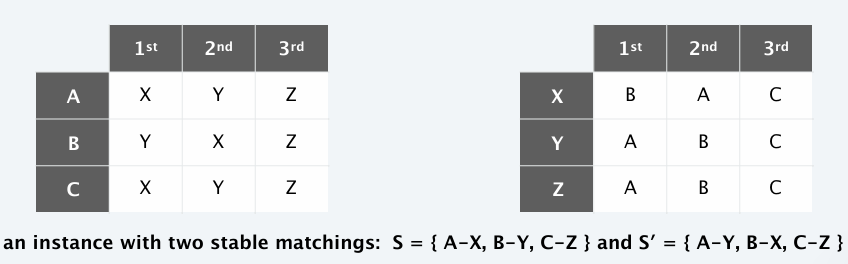

## Quiz :

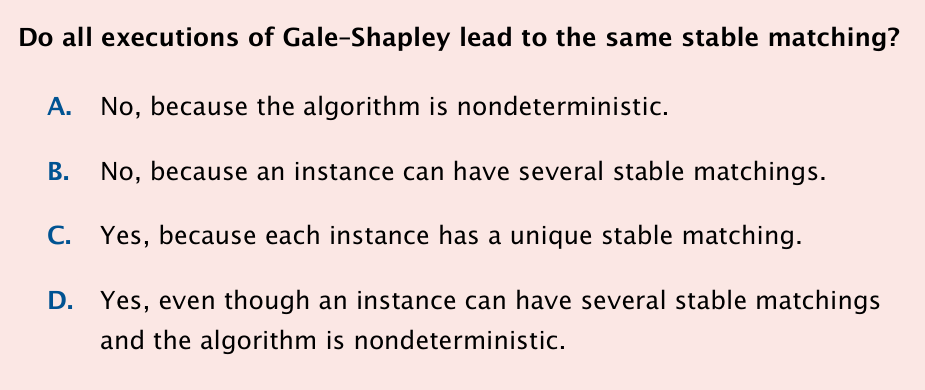

Ans: B: “No, because an instance can have several stable matchings.”

- Thuật toán Gale–Shapley luôn tạo ra một ghép đôi ổn định, nhưng một bài toán có thể có nhiều ghép đôi ổn định khác nhau.
- Kết quả của thuật toán còn phụ thuộc bên nào (bệnh viện hay sinh viên) đóng vai trò “propose” trong quá trình chạy. Ví dụ, nếu để bệnh viện propose, ta được ghép đôi “thuận lợi” cho bệnh viện (hospital-optimal); còn nếu sinh viên propose, ta được ghép đôi “thuận lợi” cho sinh viên (student-optimal).
- Do đó, cùng một đầu vào có thể dẫn đến nhiều kết quả ghép đôi ổn định khác nhau (tùy theo quy tắc propose), đồng thời khẳng định không phải mọi lần chạy đều cho cùng một ghép đôi.
- Thuật toán thực chất mang tính chất xác định (deterministic) khi đã chọn rõ bên đề nghị và thứ tự duyệt danh sách, vì thế lý do “nondeterministic” (A, D) là không đúng. Cũng không đúng khi nói mỗi bài toán chỉ có một ghép đôi duy nhất (C) vì thực tế có thể tồn tại nhiều ghép đôi ổn định.

## Valid partner

Student s is a **valid partner** for hospital h if there exists any stable matching in which h and s are matched.(mỗi h sẽ có một tập valid partner, tức là tập những thằng được ghép với h tại ít nhất 1 stable matching nào đó)

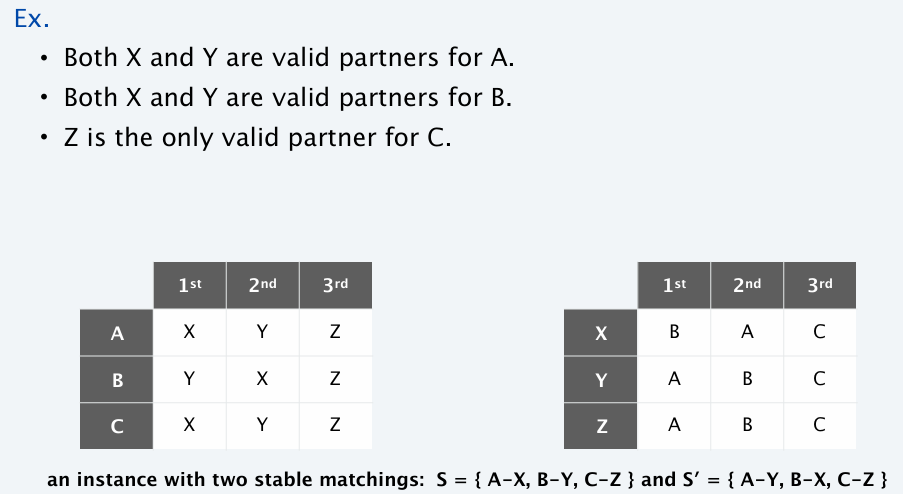

### Quiz: Find Best Valid Partner

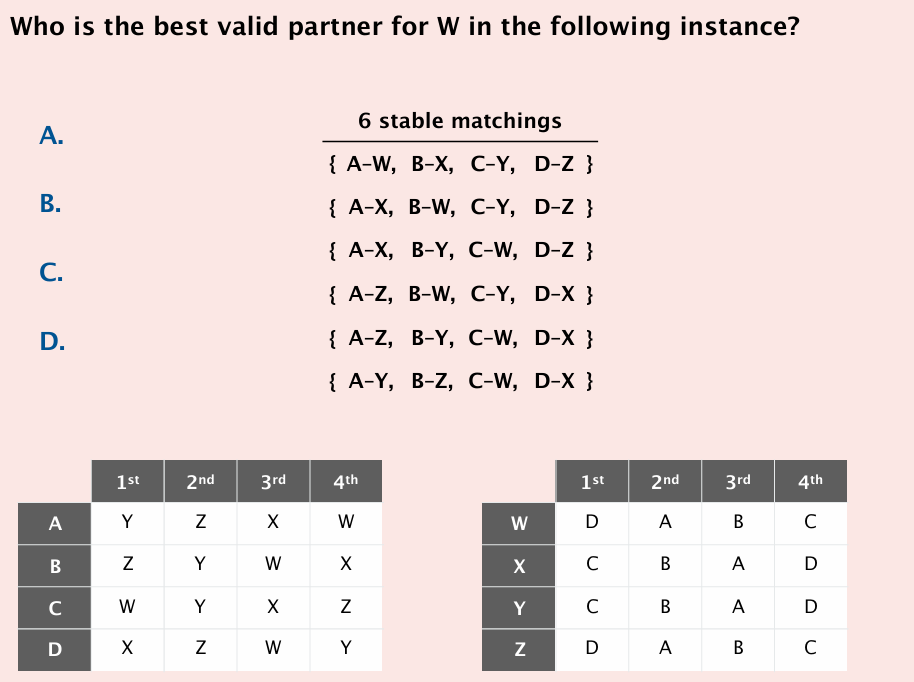



#### **Giải thích:**

##### **Bước 1: Định nghĩa "Best Valid Partner"**
- "Best Valid Partner" của $ W $ là đối tác hợp lệ mà $ W $ **thích nhất** trong tất cả các ghép đôi ổn định.
- Để tìm "Best Valid Partner," ta cần:
  1. Xác định tất cả các đối tác hợp lệ của $ W $ (những người được ghép với $ W $ trong ít nhất một ghép đôi ổn định).
  2. Chọn đối tác mà $ W $ thích nhất trong danh sách này.

---

##### **Bước 2: Xác định tất cả các đối tác hợp lệ của $ W $**
Dựa vào 6 ghép đôi ổn định được liệt kê:
1. $ A-W, B-X, C-Y, D-Z $ → $ W $ được ghép với $ A $.
2. $ A-X, B-W, C-Y, D-Z $ → $ W $ được ghép với $ B $.
3. $ A-X, B-Y, C-W, D-Z $ → $ W $ được ghép với $ C $.
4. $ A-Z, B-W, C-Y, D-X $ → $ W $ được ghép với $ B $.
5. $ A-Z, B-Y, C-W, D-X $ → $ W $ được ghép với $ C $.
6. $ A-Y, B-Z, C-W, D-X $ → $ W $ được ghép với $ C $.

**Tập hợp đối tác hợp lệ của $ W $:**  
$ A, B, C $.

---

##### **Bước 3: Xác định đối tác mà $ W $ thích nhất**
Dựa vào danh sách ưu tiên của $ W $ (bên phải bảng dưới cùng):
- $ W $ thích $ D > A > B > C $.

Trong tập hợp đối tác hợp lệ $ \{A, B, C\} $, $ W $ thích $ A $ nhất.

---

##### **Kết luận:**
"Best Valid Partner" của $ W $ là **$ A $**.  


## Hospital-optimal assignment

1. Hospital-Optimal Assignment là gì?
- Hospital-optimal assignment là một ghép đôi ổn định mà trong đó mỗi bệnh viện nhận được đối tác hợp lệ tốt nhất (best valid partner) của mình.
- Thuật toán Gale–Shapley, khi bệnh viện là bên propose, luôn tạo ra một ghép đôi ổn định mà các bệnh viện đạt được đối tác tốt nhất có thể trong tất cả các ghép đôi ổn định.

2. Claim: All executions of Gale–Shapley yield hospital-optimal assignment
- Khi bệnh viện là bên propose, thuật toán Gale–Shapley luôn dẫn đến hospital-optimal assignment.
- Điều này đúng vì:
  - Bệnh viện đề nghị theo thứ tự ưu tiên của mình.
  - Sinh viên chỉ từ chối bệnh viện nếu họ nhận được lời đề nghị từ một bệnh viện mà họ thích hơn.
  - Kết quả cuối cùng là mỗi bệnh viện được ghép với đối tác tốt nhất mà họ có thể đạt được trong bất kỳ ghép đôi ổn định nào.

  

> Corollary: Hospital-optimal assignment is a stable matching

### Còn đoạn chứng minh của Hospital Optimal và Quiz

# Lecture Note:

## 20/02/2025

## Với thầy Wong bài Matching có thể hai bên size khác nhau

## Stable & Unstable - Checking

## What is Blocking Pair

https://quizizz.com/join/game/U2FsdGVkX1%252Fwjw7PHKFDrnA8yNa0pvPjM3%252BVgkt2AZwdzgjZgXpa69PPOwoUZGHK3xoADQRSXJUuNsSrI3YO9A%253D%253D?page=summary

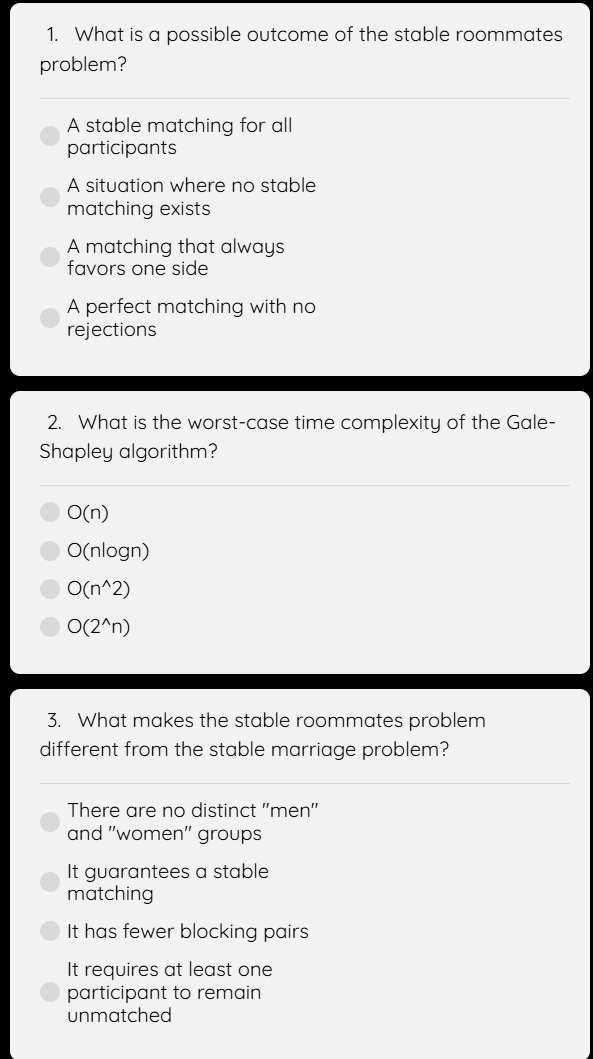

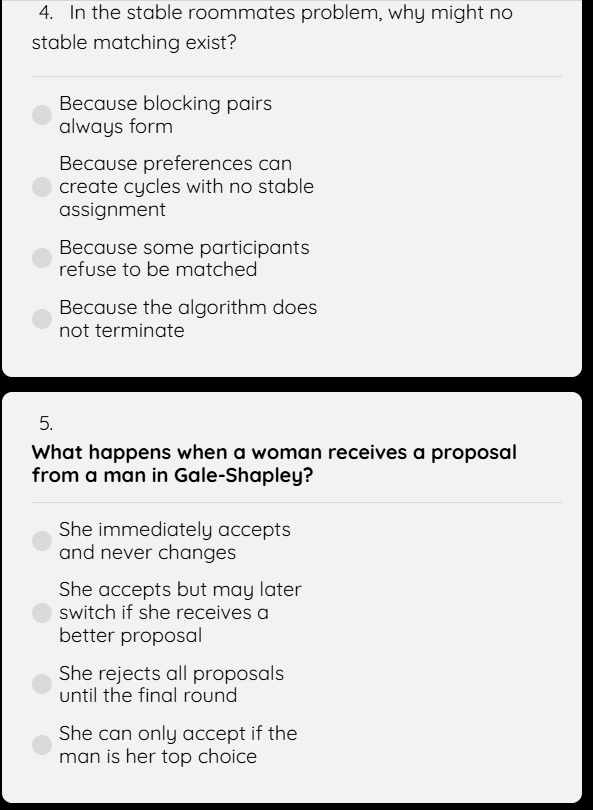

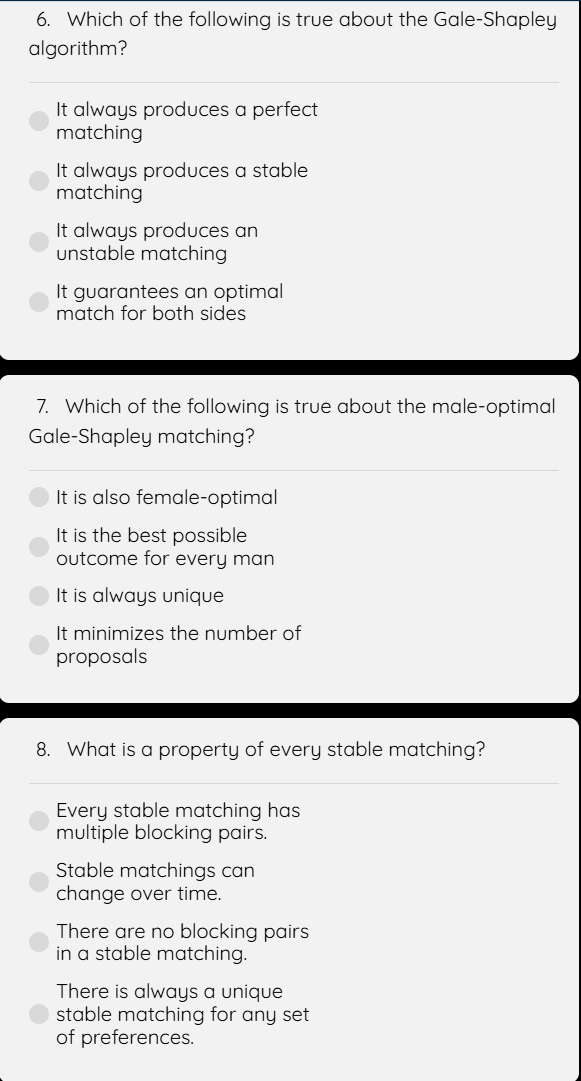

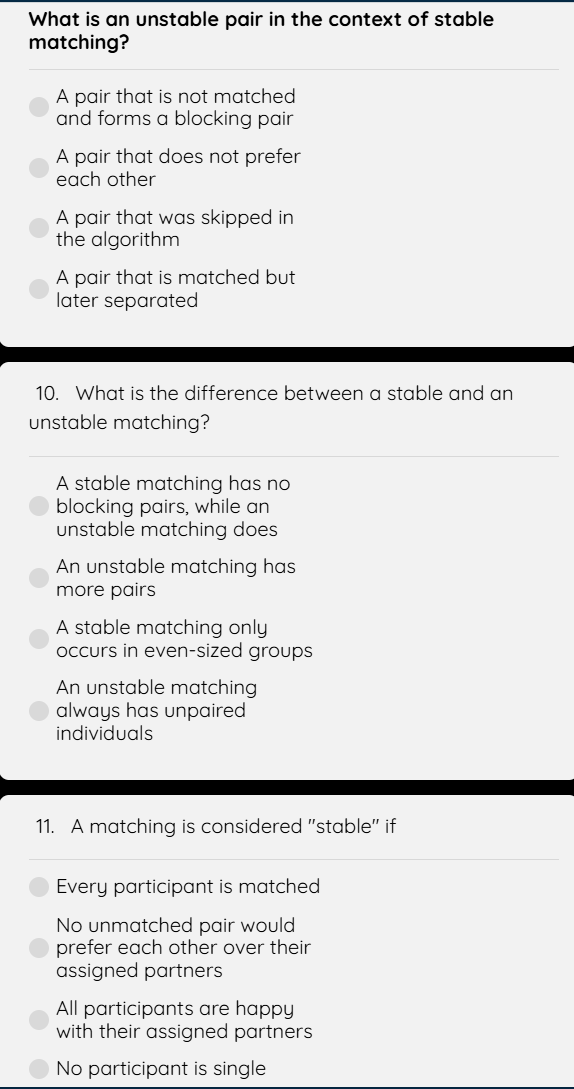

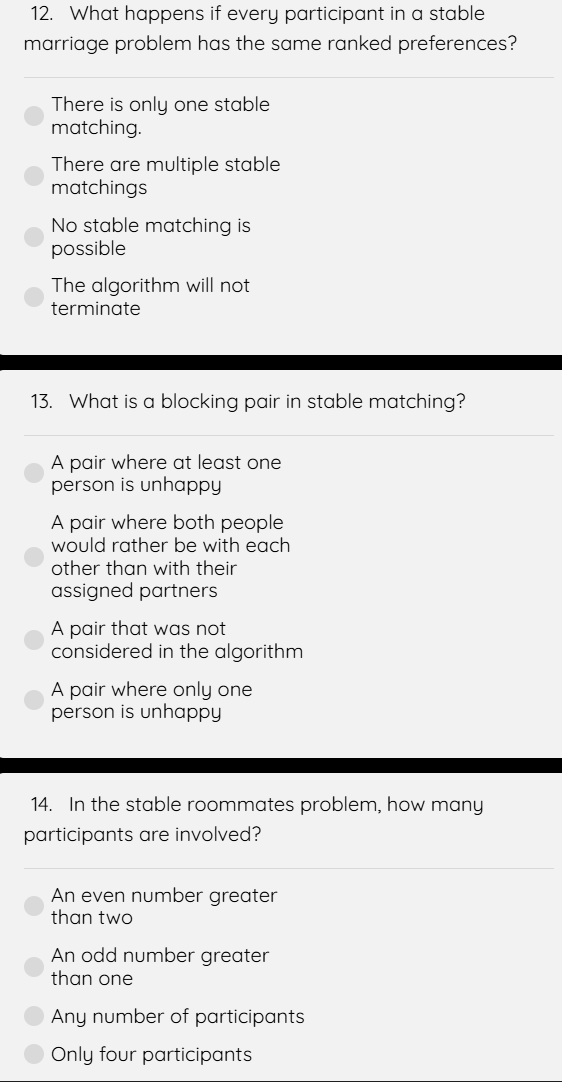

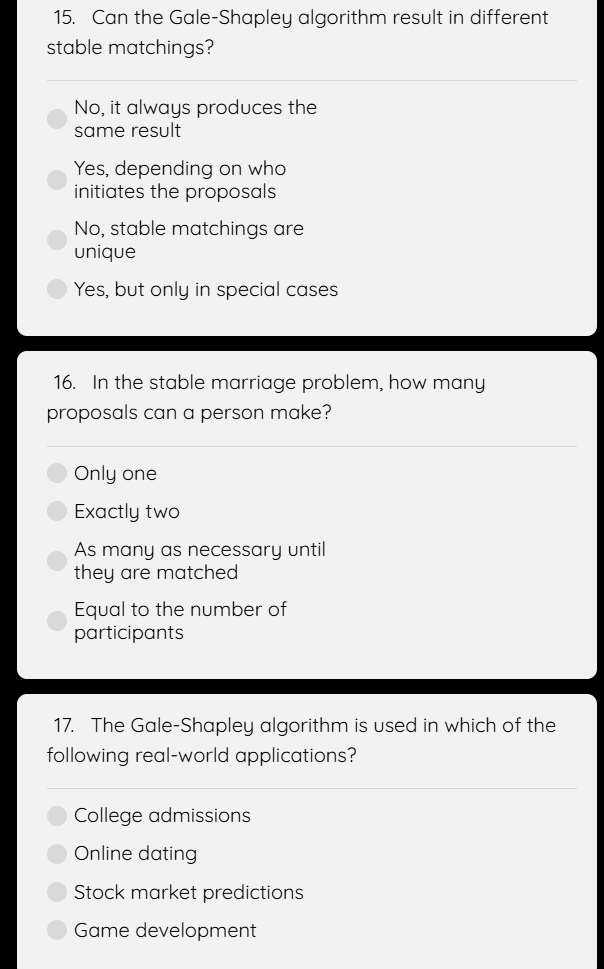

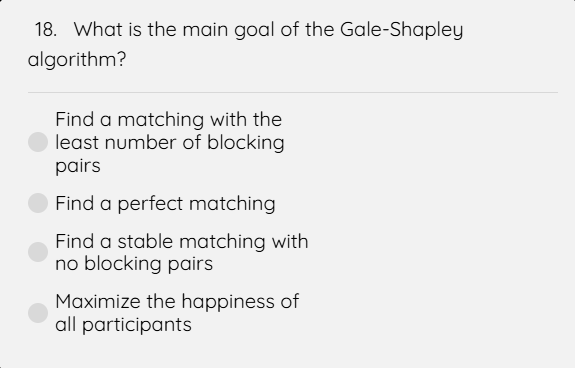